Linear interpolation formula
 
0.9413 x + 56.07
Shapiro test result:  (0.9491348266601562, 0.7332701683044434)

Square interpolation formula
           2
-0.008688 x + 2.113 x + 24.59
Shapiro test result:  (0.9765781164169312, 0.933339536190033)

Cubical interpolation formula
            3           2
-0.0002069 x + 0.03349 x - 0.4465 x + 67.69
Shapiro test result:  (0.970741331577301, 0.8973768949508667)



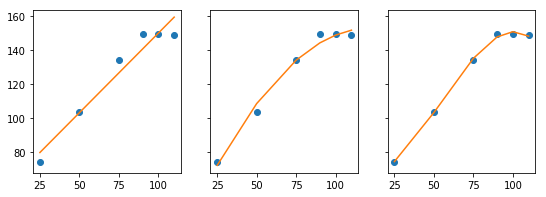

In [1]:
%matplotlib inline

from numpy import (
    poly1d,
    polyfit,
)
from matplotlib import pyplot
from scipy import stats

pressure = [74.2, 103.4, 134.4, 149.8, 149.4, 148.8]
load = [25, 50, 75, 90, 100, 110]

line = poly1d(polyfit(load, pressure, 1))
print("Linear interpolation formula")
print(line)
print("Shapiro test result: ", stats.shapiro(line(load) - pressure))
print()

square = poly1d(polyfit(load, pressure, 2))
print("Square interpolation formula")
print(square)
print("Shapiro test result: ", stats.shapiro(square(load) - pressure))
print()

cube = poly1d(polyfit(load, pressure, 3))
print("Cubical interpolation formula")
print(cube)
print("Shapiro test result: ", stats.shapiro(cube(load) - pressure))
print()

fig, axs = pyplot.subplots(1, 3, figsize=(9, 3), sharey=True)

axs[0].plot(load, pressure, 'o', load, line(load))
axs[1].plot(load, pressure, 'o', load, square(load))
axs[2].plot(load, pressure, 'o', load, cube(load))

pyplot.show()

Polynomial regression with squares loss function
is derived from a suggestion that a Gaussian noise was applied to explored sample.
So, it's needed to check normality of errors that we've got after fitting.

I've applied Shapiro-Wilk test for normality to results of linear, quadratic and cubical interpolation.
The data "set" is tiny, but the test is the only thing I can rely on.
It shows that $p$-value for normality in the case of the quadratic approximation is greater than for other cases.
There's no reason of taking power more than $3$, because in that case we will have almost ideal match
because of polynomials' roots properties.